# Backtesting the 'buying-the-dip' Trading Strategy

## Libraries and settings

In [1]:
# Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: u:\Lektionen\GitHub_Repositories\summerschool_FS2024\Trading_Bot


## Historical Data iShares Core MSCI World UCITS ETF

In [2]:
# Load historical data iShares Core MSCI World UCITS ETF
ticker = 'IWDA.AS'
df = yf.download(ticker, start='2010-01-01', end='2024-10-10', interval='1mo')

# Monthly return
df['Monthly Return'] = df['Adj Close'].pct_change()
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Monthly Return
Date,,,,,,,
2010-01-01,18.070000,18.600000,17.770000,17.940001,17.940001,14303,NaN
2010-02-01,17.820000,18.620001,17.139999,18.379999,18.379999,86540,0.024526
2010-03-01,18.559999,19.930000,18.549999,19.660000,19.660000,114226,0.069641
2010-04-01,19.770000,20.469999,19.770000,20.090000,20.090000,7314,0.021872
2010-05-01,20.070000,20.415001,18.580000,19.549999,19.549999,35831,-0.026879
...,...,...,...,...,...,...,...
2024-06-01,92.035004,95.639999,90.980003,95.190002,95.190002,1868280,0.049851
2024-07-01,94.779999,96.699997,92.750000,95.389999,95.389999,2885520,0.002101
2024-08-01,95.495003,95.849998,86.370003,95.080002,95.080002,3642166,-0.003250


## Backtesting buying-the-dip versus fixed monthly investment Strategy

In [3]:
# Strategy 1: Invest a fixed amount every month
fixed_investment = 1000
df['Fixed Investment'] = fixed_investment
df['Fixed Shares'] = df['Fixed Investment'] / df['Adj Close']
df['Fixed Total Shares'] = df['Fixed Shares'].cumsum()
df['Fixed Portfolio Value'] = df['Fixed Total Shares'] * df['Adj Close']

# Strategy 2: Invest cumulative monthly savings after a drop of X%
threshold = 0.05
monthly_savings = 1000
df['Trigger Investment'] = 0.0
df['Trigger Shares'] = 0.0 
savings = 0.0

# Ensure that the index is a simple integer
df = df.reset_index()

# Calculate the investments and shares bought
for i in range(1, len(df)):
    if threshold == 0.00:
        # Invest fixed savings every month if the threshold is 0
        df.loc[i, 'Trigger Investment'] = monthly_savings
    else:
        # Accumulate savings if the threshold is greater than 0
        savings += monthly_savings
        # Invest the accumulated savings if the price drops by the given threshold
        if df.loc[i, 'Adj Close'] <= df.loc[i-1, 'Adj Close'] * (1 - threshold):
            df.loc[i, 'Trigger Investment'] = savings
            savings = 0
    # Calculate the number of shares bought
    df.loc[i, 'Trigger Shares'] = df.loc[i, 'Trigger Investment'] / df.loc[i, 'Adj Close']

# Calculate total shares and portfolio values
df['Trigger Total Shares'] = df['Trigger Shares'].cumsum()
df['Trigger Portfolio Value'] = df['Trigger Total Shares'] * df['Adj Close']

# Output the final portfolio values
print(f"Final portfolio value with fixed monthly investment: {df['Fixed Portfolio Value'].iloc[-1]:.2f} EUR")
print(f"Final portfolio value with investment after a drop: {df['Trigger Portfolio Value'].iloc[-1]:.2f} EUR")

# Difference in portfolio values
diff = df['Trigger Portfolio Value'].iloc[-1] - df['Fixed Portfolio Value'].iloc[-1]
print(f"\nDifference in portfolio values: {diff:.2f} EUR")

Final portfolio value with fixed monthly investment: 471819.17 EUR
Final portfolio value with investment after a drop: 394823.27 EUR

Difference in portfolio values: -76995.90 EUR


## Plot the results

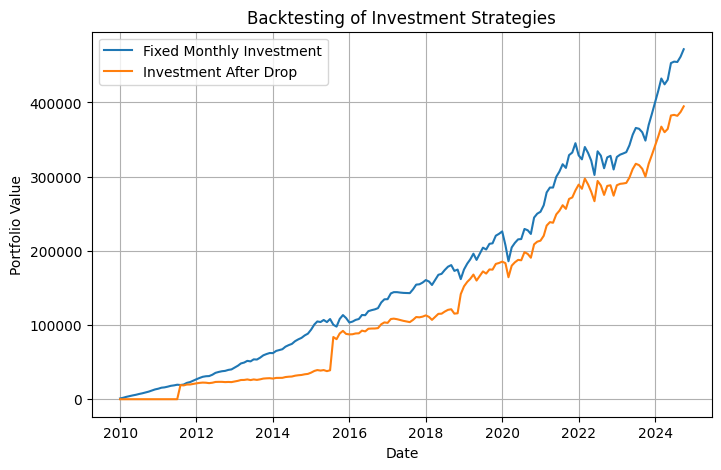

In [6]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(df['Date'], df['Fixed Portfolio Value'], label='Fixed Monthly Investment')
plt.plot(df['Date'], df['Trigger Portfolio Value'], label='Investment After Drop')
plt.title('Backtesting of Investment Strategies')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [5]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 10
Datetime: 2024-10-11 15:12:09
Python Version: 3.11.9
-----------------------------------
